In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

final value of L= 6.129982163463559e-06 , W= 0.002475880078570761


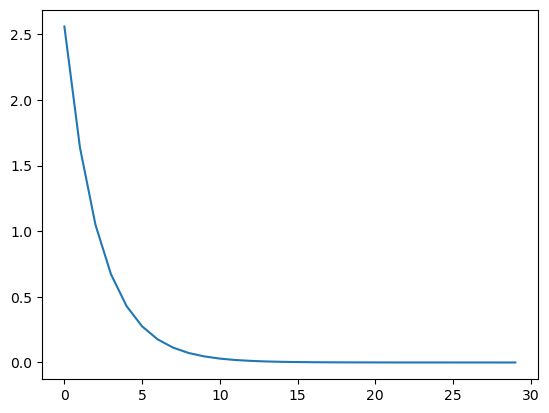

In [2]:
# Loss function L(w) = w*w
w = 2
L = []
step = 0.1
epochs = 30

for i in range (epochs):
  w = w - step * 2 * w
  L.append(w*w)

plt.plot(L)
print ("final value of L=", L[-1], ", W=", w)

In [3]:
L

[2.5600000000000005,
 1.6384,
 1.048576,
 0.67108864,
 0.42949672960000007,
 0.2748779069440001,
 0.17592186044416008,
 0.11258999068426244,
 0.07205759403792797,
 0.046116860184273904,
 0.029514790517935298,
 0.018889465931478586,
 0.012089258196146296,
 0.007737125245533629,
 0.0049517601571415215,
 0.003169126500570574,
 0.0020282409603651673,
 0.001298074214633707,
 0.0008307674973655726,
 0.0005316911983139664,
 0.00034028236692093853,
 0.00021778071482940063,
 0.00013937965749081642,
 8.920298079412252e-05,
 5.7089907708238416e-05,
 3.653754093327259e-05,
 2.3384026197294458e-05,
 1.4965776766268452e-05,
 9.578097130411809e-06,
 6.129982163463559e-06]

## Gradient descent step by step

In [4]:
X = [1.0, 2.0, 3.0]
y = [1.2, 1.8, 3.4]

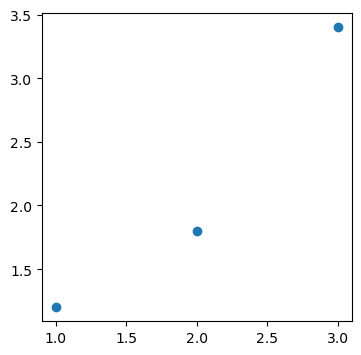

In [27]:
plt.scatter(X,y)
plt.rcParams['figure.figsize'] = [4, 4]

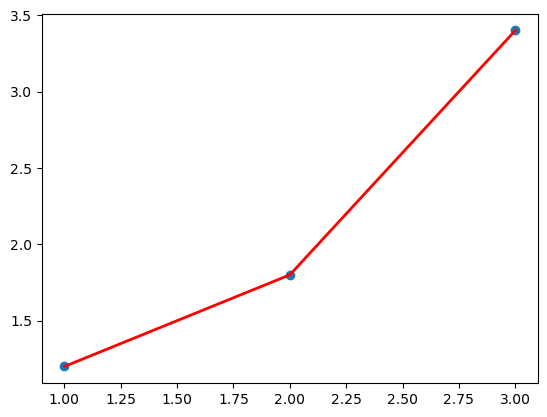

In [7]:
plt.scatter(X,y)
plt.plot(X[:3], y[:3], 'r-', lw=2)

    No straight line passes through the three points.    
    We must therefore find the line (equation y = ax + b) which passes the closest to the three points.    
    It is a linear regression.
    We will use the mean squared error (MSE) to calculate the error: Cf. wikipédia
    Random initialization of a and b:

In [10]:
a = 1
b = 0
# 3 Observations
X = np.array([3, 1, 9, 7])
y = np.array([5, 3, 2, 4])

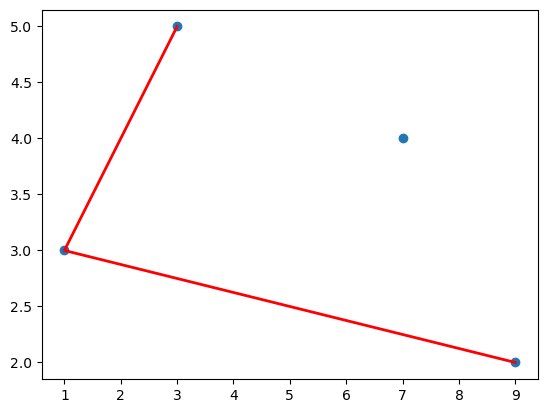

In [11]:
plt.scatter(X,y)
plt.plot(X[:3], y[:3], 'r-', lw=2)

In [12]:
def gradient_descent(_X, _y, _learningrate=0.06, _epochs=5):
    trace = pd.DataFrame(columns=['a', 'b', 'mse'])
    X = np.array(_X)
    y = np.array(_y)
    a, b = 0.2, 0.5 # Initialisation aléatoire de a et b
    mse = []
    N = len(X) 
     
    for i in range(_epochs):
        delta = y - (a*X + b)
         
        # Updating a and b
        a = a -_learningrate * (-2 * X.dot(delta).sum() / N) # on retire un gradient à a
        b = b -_learningrate * (-2 * delta.sum() / N) # idem pour b

        trace = pd.concat( [trace,pd.DataFrame(
                            data=[ [a,b, mean_squared_error(y,(a*X + b))]], 
                            columns=['a', 'b', 'mse'],
                            index=['epoch' + str(i+1)])])  
    
    print(trace)
    return a, b, trace

In [13]:
a = 1
b = 3
X = np.array([3, 1, 9, 7])
y = np.array([5, 3, 2, 4])
print(X)
delta = y - (a*X + b)
print(f'delta  : {delta}')
delta1 = delta.dot(delta)
print(f'delta1  : {delta1}')
print(f'X.dot(delta)  : {X.dot(delta)}')
print(f'X.dot(delta).sum : {X.dot(delta).sum()}')

[3 1 9 7]
delta  : [ -1  -1 -10  -6]
delta1  : 138
X.dot(delta)  : -136
X.dot(delta).sum : -136


In [14]:
def displayResult(_a, _b, _trace):
  plt.figure( figsize=(30,5))

  plt.subplot(1, 4, 1)
  plt.grid(True)
  plt.title("Distribution & line result")
  plt.scatter(X,y)
  plt.plot([X[0], X[2]], [_a * X[0] + _b, _a * X[2] + _b], 'r-', lw=2)

  plt.subplot(1, 4, 2)
  plt.title("Iterations (Coeff. a) per epochs")
  plt.plot(_trace['a'])

  plt.subplot(1, 4, 3)
  plt.title("Iterations (Coeff. b) per epochs")
  plt.plot(_trace['b'])

  plt.subplot(1, 4, 4)
  plt.title("MSE")
  plt.plot(_trace['mse'])

  print (_trace)

              a         b          mse
epoch1  0.98000  0.740000    18.373600
epoch2 -1.66000  0.483200   151.895962
epoch3  6.94208  1.841216  1596.410307
              a         b          mse
epoch1  0.98000  0.740000    18.373600
epoch2 -1.66000  0.483200   151.895962
epoch3  6.94208  1.841216  1596.410307


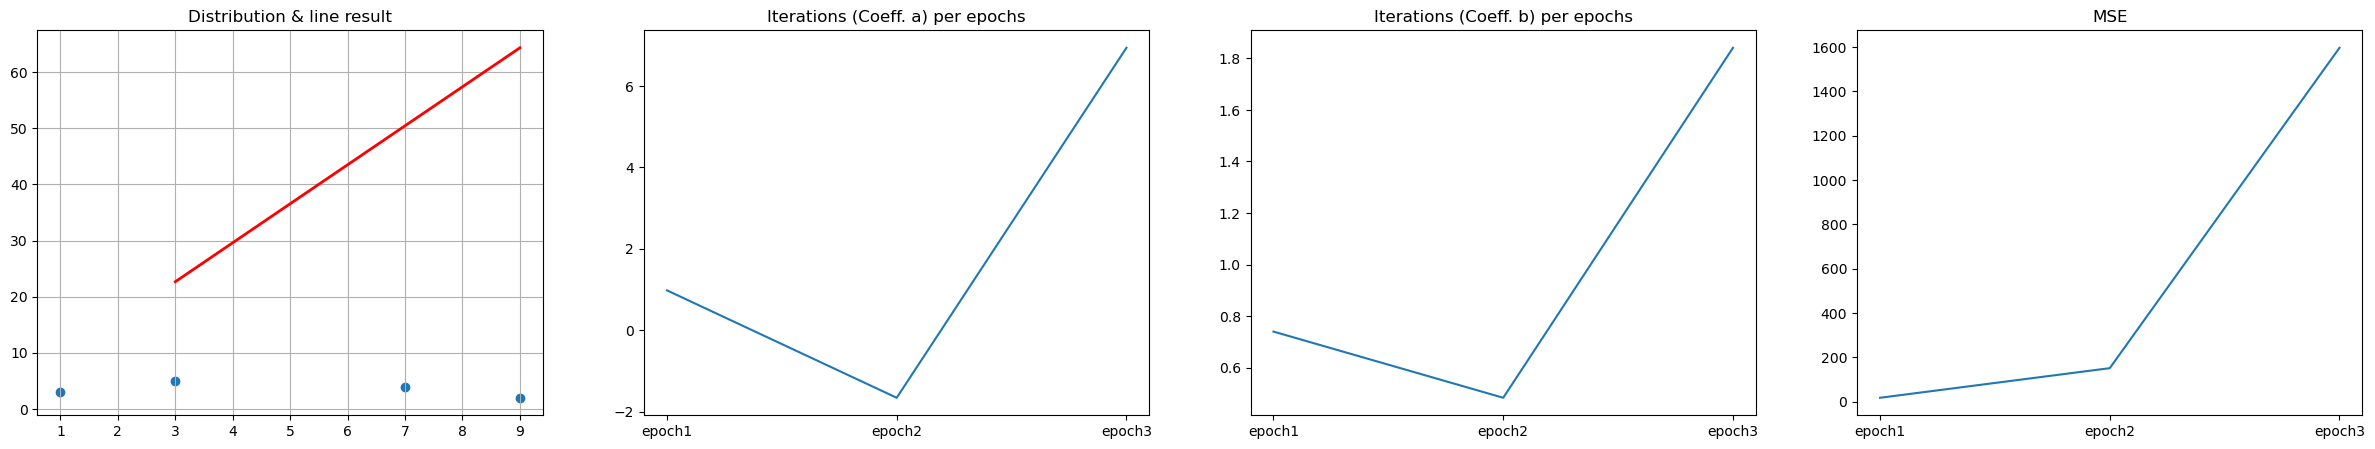

In [15]:
a, b, trace = gradient_descent(X, y, _epochs=3)
displayResult(a, b, trace)

                    a            b           mse
epoch1       0.980000     0.740000  1.837360e+01
epoch2      -1.660000     0.483200  1.518960e+02
epoch3       6.942080     1.841216  1.596410e+03
epoch4     -21.399386    -2.124978  1.720008e+04
epoch5      71.673021    11.389651  1.857290e+05
epoch6    -234.267457   -32.560920  2.005921e+06
epoch7     771.112413   112.326865  2.166484e+07
epoch8   -2533.035840  -363.399807  2.339902e+08
epoch9    8325.674574  1200.449674  2.527202e+09
epoch10 -27360.508440 -3938.589031  2.729494e+10
                    a            b           mse
epoch1       0.980000     0.740000  1.837360e+01
epoch2      -1.660000     0.483200  1.518960e+02
epoch3       6.942080     1.841216  1.596410e+03
epoch4     -21.399386    -2.124978  1.720008e+04
epoch5      71.673021    11.389651  1.857290e+05
epoch6    -234.267457   -32.560920  2.005921e+06
epoch7     771.112413   112.326865  2.166484e+07
epoch8   -2533.035840  -363.399807  2.339902e+08
epoch9    8325.67457

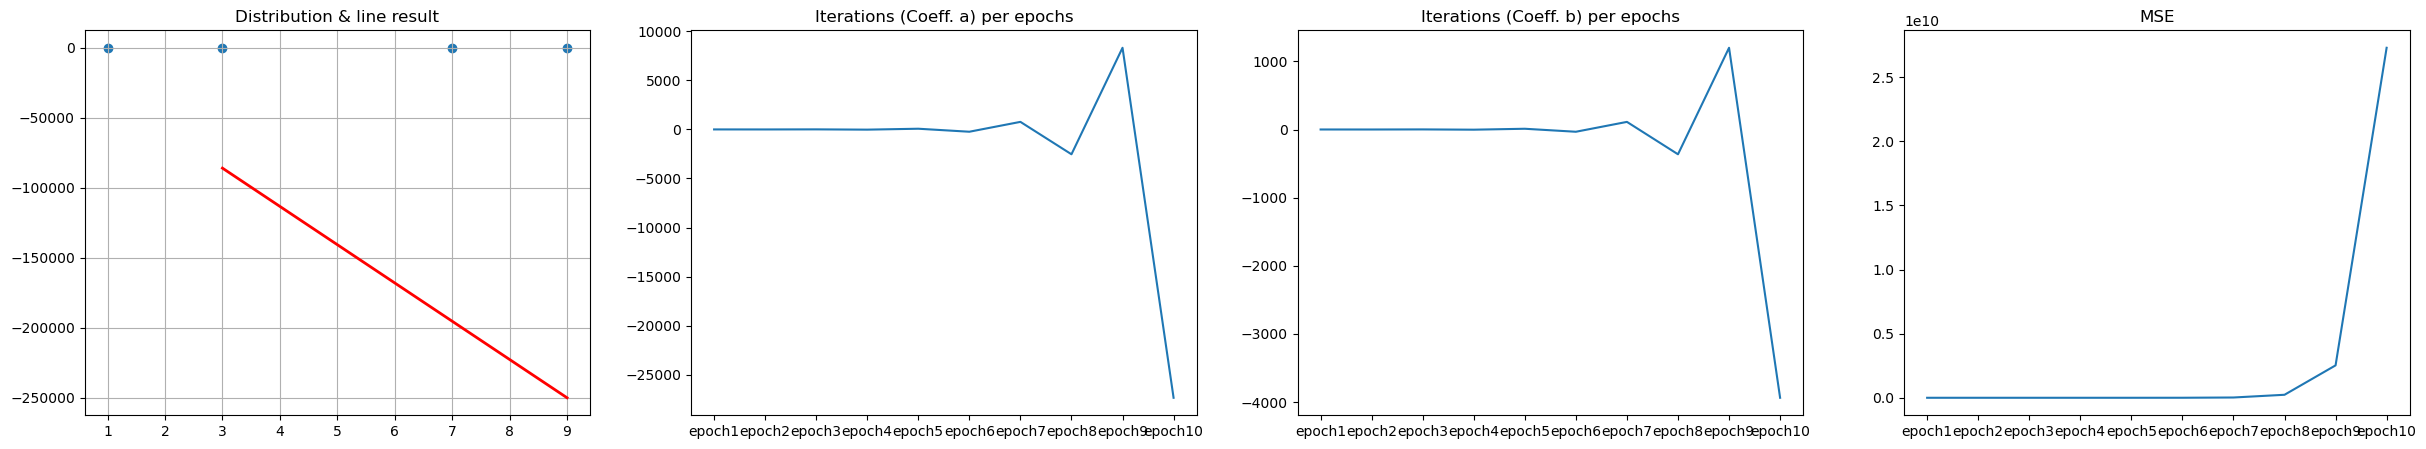

In [16]:
a, b, trace = gradient_descent(X, y, _epochs=10)
displayResult(a, b, trace)

## SGD : Stochastic Gradient Descent

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

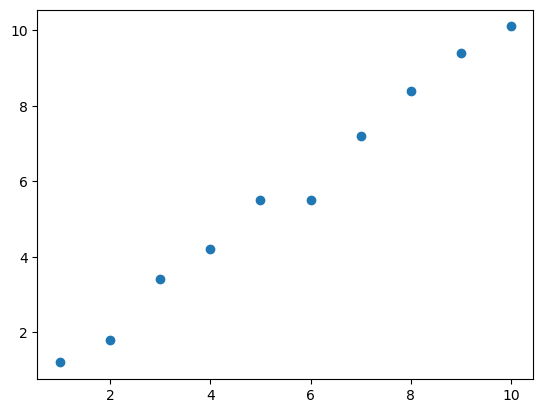

In [18]:
X = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [1.2, 1.8, 3.4, 4.2, 5.5, 5.5, 7.2, 8.4, 9.4, 10.1]
plt.scatter(X,y)

### Create a batch (data package) of 3 data items:

In [19]:
# Select randomly 3 items index (random from 0 to length)) in the dataset
#np.random.seed(1)
idx = np.random.randint(0, len(X), 3)
# take the items by selecting their index
np.take(X, idx)

array([6., 2., 1.])

In [20]:
a=np.arange(16).reshape(4,4)
print(a)
print(a.take([0,3],axis=1))
print(a.take([0,3]))
print(a.take([0,3],axis=0))
print(a.take([0,3,2,2,2],axis=0))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  3]
 [ 4  7]
 [ 8 11]
 [12 15]]
[0 3]
[[ 0  1  2  3]
 [12 13 14 15]]
[[ 0  1  2  3]
 [12 13 14 15]
 [ 8  9 10 11]
 [ 8  9 10 11]
 [ 8  9 10 11]]


In [21]:
def displayResult(_a, _b, _trace, X, y):
  plt.figure( figsize=(30,5))

  plt.subplot(1, 4, 1)
  plt.grid(True)
  plt.title("Distribution & line result")
  plt.scatter(X, y)
  plt.plot([X[0], X[len(X)-1]], [_a * X[0] + _b, _a * X[len(X)-1] + _b], 'r-', lw=2)

  plt.subplot(1, 4, 2)
  plt.title("Iterations (Coeff. a) per epochs")
  plt.plot(_trace['a'])

  plt.subplot(1, 4, 3)
  plt.title("Iterations (Coeff. b) per epochs")
  plt.plot(_trace['b'])

  plt.subplot(1, 4, 4)
  plt.title("MSE")
  plt.plot(_trace['mse'])

  print (_trace)

In [22]:
def SGD(_X, _y, _learningrate=0.06, _epochs=5, _batch_size=1):
    a, b = 0.2, 0.5 
    trace = pd.DataFrame(columns=['a', 'b', 'mse'])

    for i in range(_epochs):
        # stochastic stuff / create batch (data packages) here
        indexes = np.random.randint(0, len(_X), _batch_size) # random sample
        print(f'index : {indexes}')
        X = np.take(np.array(_X), indexes)
        print(f'X : {X}')
        y = np.take(np.array(_y), indexes)
        print(f'y : {y}')
        N = len(X)
        delta = y - (a*X + b)
        
        # Updating a and b
        a = a - _learningrate * (-2 * X.dot(delta).sum() / N)
        b = b - _learningrate * (-2 * delta.sum() / N)

        trace = pd.concat([trace,pd.DataFrame(data=[[a, b, mean_squared_error(np.array(y), a*np.array(X)+b)]], 
                                          columns=['a', 'b', 'mse'], 
                                          index=['epoch ' + str(i+1)])])

    return a, b, trace

index : [1 0 6 8 4]
X : [2. 1. 7. 9. 5.]
y : [1.8 1.2 7.2 9.4 5.5]
index : [1 8 8 4 6]
X : [2. 9. 9. 5. 7.]
y : [1.8 9.4 9.4 5.5 7.2]
index : [0 6 0 1 4]
X : [1. 7. 1. 2. 5.]
y : [1.2 7.2 1.2 1.8 5.5]
index : [7 5 5 4 8]
X : [8. 6. 6. 5. 9.]
y : [8.4 5.5 5.5 5.5 9.4]
index : [6 3 2 7 1]
X : [7. 4. 3. 8. 2.]
y : [7.2 4.2 3.4 8.4 1.8]
index : [6 1 5 8 4]
X : [7. 2. 6. 9. 5.]
y : [7.2 1.8 5.5 9.4 5.5]
index : [0 8 3 4 4]
X : [1. 9. 4. 5. 5.]
y : [1.2 9.4 4.2 5.5 5.5]
index : [3 9 5 4 2]
X : [ 4. 10.  6.  5.  3.]
y : [ 4.2 10.1  5.5  5.5  3.4]
index : [7 5 2 5 5]
X : [8. 6. 3. 6. 6.]
y : [8.4 5.5 3.4 5.5 5.5]
index : [5 0 9 1 3]
X : [ 6.  1. 10.  2.  4.]
y : [ 5.5  1.2 10.1  1.8  4.2]
                     a            b           mse
epoch 1       3.159200     0.927200  1.626608e+02
epoch 2      -9.733082    -0.811130  5.688137e+03
epoch 3      11.279509     3.429309  1.910875e+03
epoch 4     -51.142995    -5.363087  1.354960e+05
epoch 5     129.798270    25.338848  5.027706e+05
epoch 6   

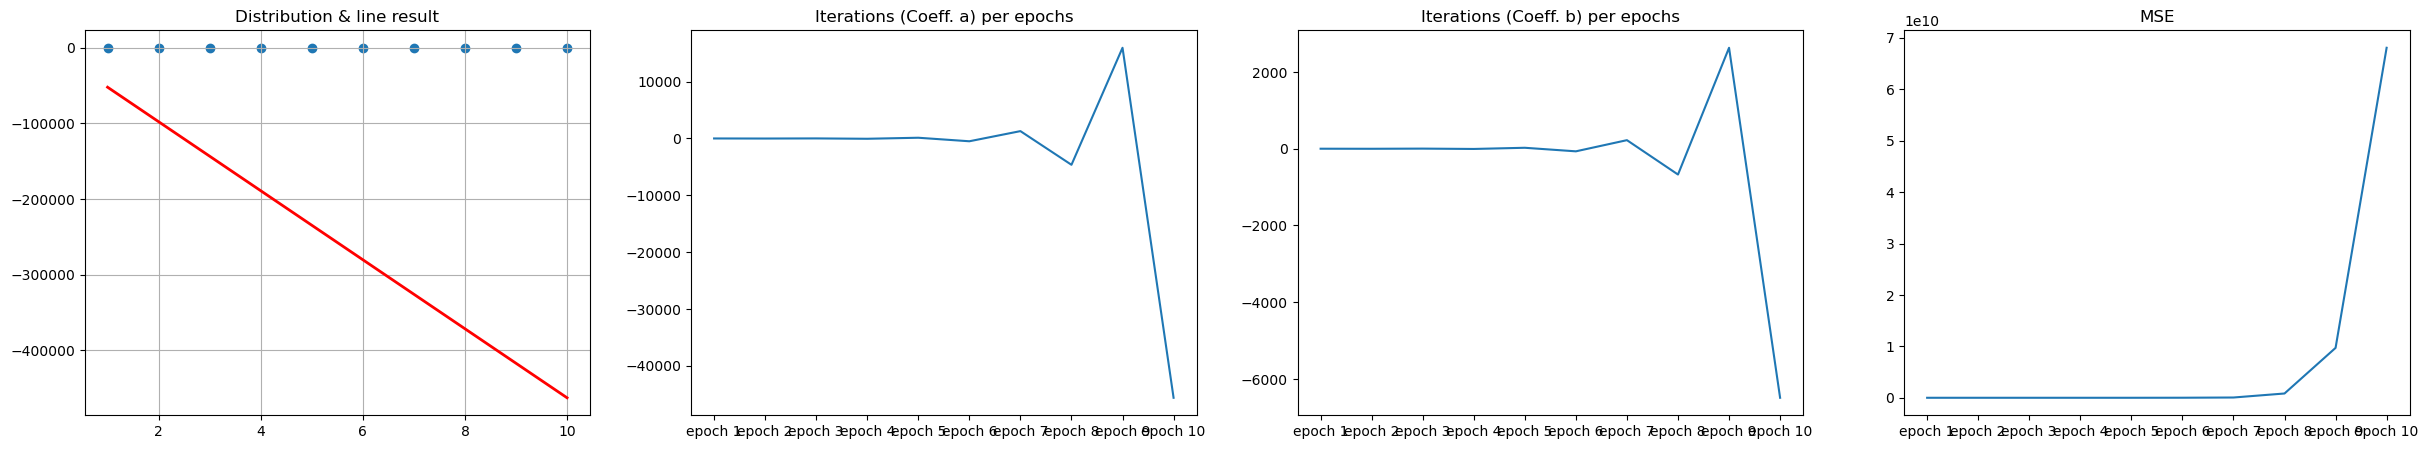

In [23]:
a, b, trace = SGD(X, y, _epochs=10, _batch_size=5,  _learningrate=0.06)
displayResult(a, b, trace, X, y)
X = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [1.2, 1.8, 3.4, 4.2, 5.5, 5.5, 7.2, 8.4, 9.4, 10.1]

## Ouch !! what happened ?

    zigzag may imply a learning rate to big !
    Less data would also mean more epochs ..

index : [1 0 4 9 5]
X : [ 2.  1.  5. 10.  6.]
y : [ 1.8  1.2  5.5 10.1  5.5]
index : [6 6 0 7 1]
X : [7. 7. 1. 8. 2.]
y : [7.2 7.2 1.2 8.4 1.8]
index : [8 9 0 9 0]
X : [ 9. 10.  1. 10.  1.]
y : [ 9.4 10.1  1.2 10.1  1.2]
index : [3 0 7 3 5]
X : [4. 1. 8. 4. 6.]
y : [4.2 1.2 8.4 4.2 5.5]
index : [9 2 8 1 5]
X : [10.  3.  9.  2.  6.]
y : [10.1  3.4  9.4  1.8  5.5]
index : [0 9 5 5 9]
X : [ 1. 10.  6.  6. 10.]
y : [ 1.2 10.1  5.5  5.5 10.1]
index : [7 4 5 7 6]
X : [8. 5. 6. 8. 7.]
y : [8.4 5.5 5.5 8.4 7.2]
index : [1 0 5 2 1]
X : [2. 1. 6. 3. 2.]
y : [1.8 1.2 5.5 3.4 1.8]
index : [6 5 2 4 7]
X : [7. 6. 3. 5. 8.]
y : [7.2 5.5 3.4 5.5 8.4]
index : [1 1 8 5 0]
X : [2. 2. 9. 6. 1.]
y : [1.8 1.8 9.4 5.5 1.2]
                 a         b        mse
epoch 1   0.224220  0.503360  16.676472
epoch 2   0.248774  0.506896  16.942611
epoch 3   0.289351  0.511246  25.893560
epoch 4   0.306302  0.514104  10.341774
epoch 5   0.335608  0.517792  17.165475
epoch 6   0.367706  0.521539  17.024002
epoch 7   

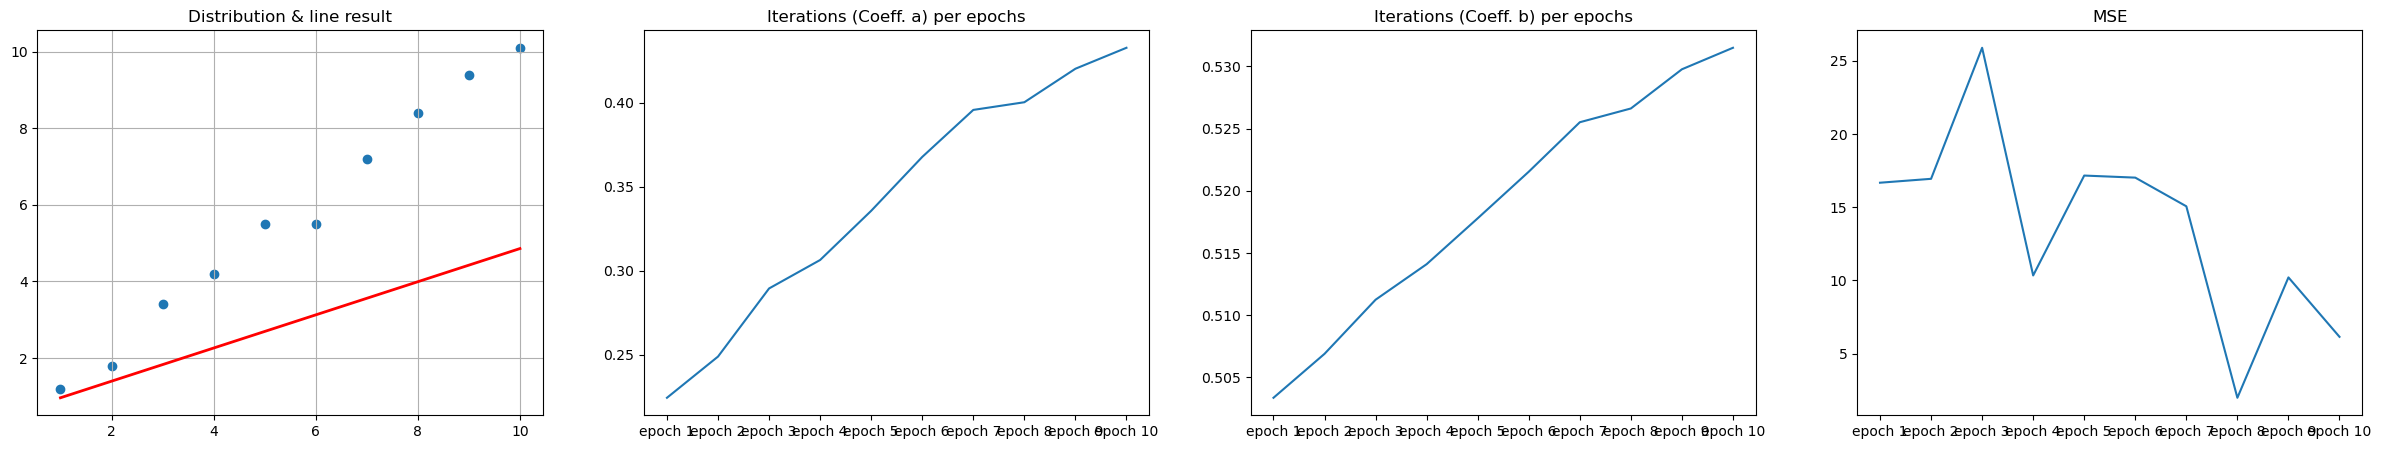

In [24]:
a, b, trace = SGD(X, y, _epochs=10, _batch_size=5,  _learningrate=0.0005)
displayResult(a, b, trace, X, y)

index : [5 2 6 4 4]
X : [6. 3. 7. 5. 5.]
y : [5.5 3.4 7.2 5.5 5.5]
index : [0 6 3 3 2]
X : [1. 7. 4. 4. 3.]
y : [1.2 7.2 4.2 4.2 3.4]
index : [0 4 6 2 7]
X : [1. 5. 7. 3. 8.]
y : [1.2 5.5 7.2 3.4 8.4]
index : [1 4 0 7 2]
X : [2. 5. 1. 8. 3.]
y : [1.8 5.5 1.2 8.4 3.4]
index : [6 0 7 5 2]
X : [7. 1. 8. 6. 3.]
y : [7.2 1.2 8.4 5.5 3.4]
index : [6 1 7 2 8]
X : [7. 2. 8. 3. 9.]
y : [7.2 1.8 8.4 3.4 9.4]
index : [1 1 2 4 3]
X : [2. 2. 3. 5. 4.]
y : [1.8 1.8 3.4 5.5 4.2]
index : [7 9 9 3 0]
X : [ 8. 10. 10.  4.  1.]
y : [ 8.4 10.1 10.1  4.2  1.2]
index : [6 8 5 5 9]
X : [ 7.  9.  6.  6. 10.]
y : [ 7.2  9.4  5.5  5.5 10.1]
index : [5 6 3 9 5]
X : [ 6.  7.  4. 10.  6.]
y : [ 5.5  7.2  4.2 10.1  5.5]
index : [3 5 5 6 2]
X : [4. 6. 6. 7. 3.]
y : [4.2 5.5 5.5 7.2 3.4]
index : [7 1 5 5 2]
X : [8. 2. 6. 6. 3.]
y : [8.4 1.8 5.5 5.5 3.4]
index : [2 2 6 4 6]
X : [3. 3. 7. 5. 7.]
y : [3.4 3.4 7.2 5.5 7.2]
index : [3 8 5 5 7]
X : [4. 9. 6. 6. 8.]
y : [4.2 9.4 5.5 5.5 8.4]
index : [4 5 3 6 2]
X : [5. 6. 4

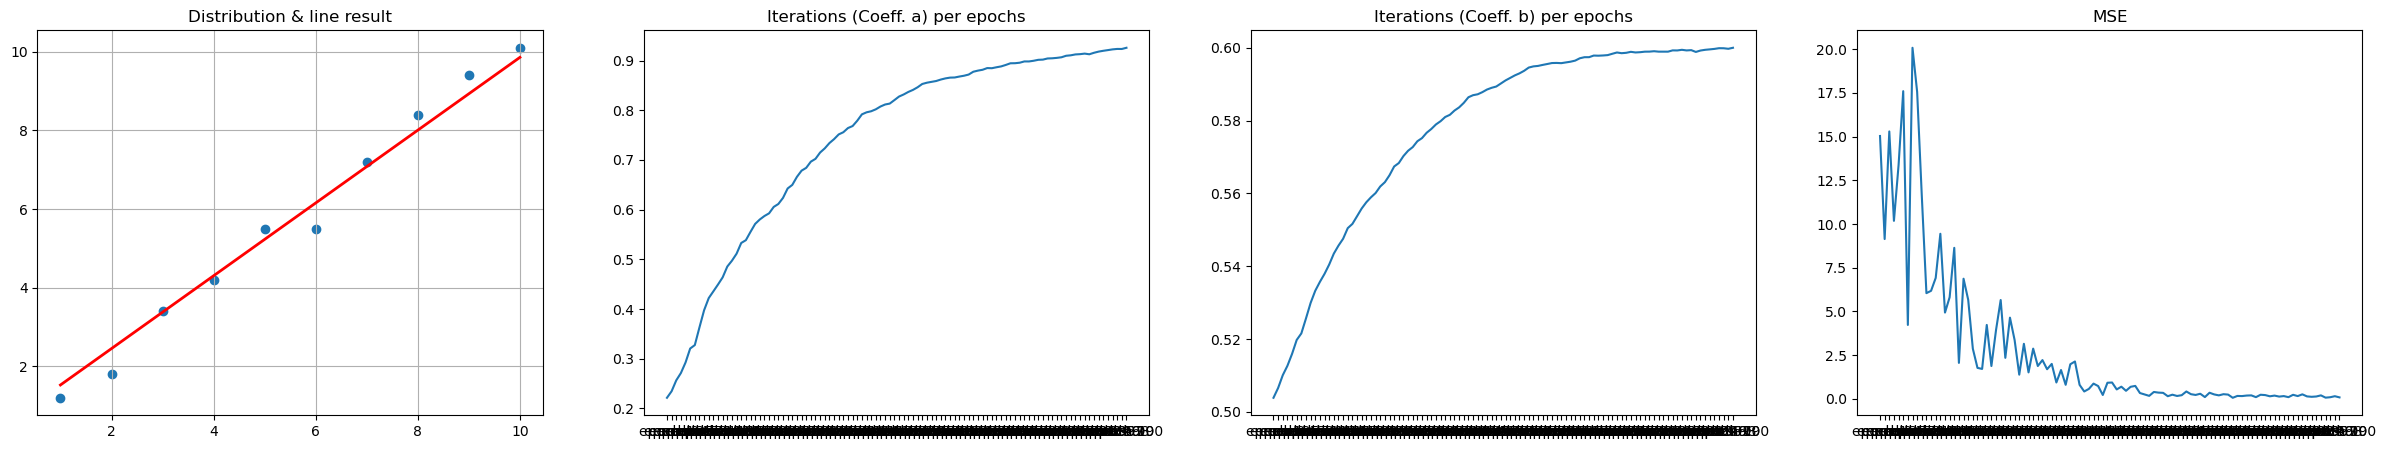

In [25]:
a, b, trace = SGD(X, y, _epochs=100, _batch_size=5,  _learningrate=0.0005)
displayResult(a, b, trace, X, y)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

rond_bleus = [(0, 3), (1, 1.5), (1,4), (1.5,2.5), (2,2.5), (3, 3.5), (3.5, 3.25), (4,3), (4,4), (5,4)]
carres_rouges = [(1,1), (2,0.5), (2,2), (3,1.5), (3,2.75), (4,1), (4,2.5), (4.5, 3), (5, 1), (5, 2.25)]

def sigma(x):
    return 1 / (1 + np.exp(-x))
    
N = len(rond_bleus) + len (carres_rouges)

def E(a,b,c):
    somme_rouges = sum([(sigma(a*x+b*y+c)-1)**2 for x,y in carres_rouges])
    somme_bleus  = sum([(sigma(a*x+b*y+c))**2 for x,y in rond_bleus])
    return (somme_rouges + somme_bleus) / N

def gradiant(a,b,c):
    ga_rouges =  1/N * sum([ 2*x*sigma(a*x+b*y+c) * (1-(sigma(a*x+b*y+c))) * (sigma(a*x+b*y+c)-1) for x,y in carres_rouges ])
    gb_rouges =  1/N * sum([ 2*y*sigma(a*x+b*y+c) * (1-(sigma(a*x+b*y+c))) * (sigma(a*x+b*y+c)-1) for x,y in carres_rouges ])
    gc_rouges =  1/N * sum([   2*sigma(a*x+b*y+c) * (1-(sigma(a*x+b*y+c))) * (sigma(a*x+b*y+c)-1) for x,y in carres_rouges ])
    return ga_rouges, gb_rouges, gc_rouges

# def descent_gradiant(a,b,c):
#    pa = p - delta()
# 
    
 
                                                                